# **Perfume Recommandation System with NLP**






Nourchene Ferchichi, AI Engineer at InstaDeep  
n.ferchichi@instadeep.com




Niche Parfumes are rare perfumes created by limited distribution, caracterised by their intiguing smell and unique story. There is a whole unique vocabulary when it comes to discribing, giving impression about niche perfumes which is perfect for NLP!
In this workshop, we are going to train a model able to:
- Get relevant recommendations based on perfumes description. The recommandation should match a description of **a mood**, **a feeling**, **a personality**, or **an event** like a vacation, birthday.
- Get relevant recommendations that take sentiment into account. The recommendation should understand what **I don’t like** as well as what **I do like**.

# Import Packages

In [1]:
#pickle: The data format used by pickle is Python-specific. 
import pickle 

#pandas: Carries out data analysis workflow in Python without having to switch to a more domain specific language like R.
import pandas as pd 

#nlkt: Easy-to-use interfaces to work with human language data for text processing
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

#sklearn: Machine learning library for the Python including: Classification Regression,Clustering algorithm...
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

#scipy: Contains modules for optimization, linear algebra, integration... 
from scipy import sparse

import re

#gensim: Python library for topic modelling, document indexing and similarity retrieval with large corpora. 
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models.doc2vec import Doc2Vec

from skimage import io

import numpy as np

from textwrap import wrap

import ipywidgets as widgets

#matplotlib: Produces good quality figures 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Discover the Data

The data is composed of a document per perfume that contains:

* Name
* URL Image
* Description
* Reviews
* Notes

In [2]:
!wget -O perfume_data.pkl https://github.com/FerchichiNourchene/NLPWorkshop/blob/master/perfume_data.pkl?raw=true

--2019-11-22 16:44:34--  https://github.com/FerchichiNourchene/NLPWorkshop/blob/master/perfume_data.pkl?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/FerchichiNourchene/NLPWorkshop/raw/master/perfume_data.pkl [following]
--2019-11-22 16:44:34--  https://github.com/FerchichiNourchene/NLPWorkshop/raw/master/perfume_data.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FerchichiNourchene/NLPWorkshop/master/perfume_data.pkl [following]
--2019-11-22 16:44:34--  https://raw.githubusercontent.com/FerchichiNourchene/NLPWorkshop/master/perfume_data.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|1

In [3]:
# Load description features
df = pd.read_pickle("perfume_data.pkl")
print (df.shape)
df.head(5)

(2044, 6)


,perfume_id,title,image_url,description,notes,reviews
0,0,Lost Cherry Eau de Parfum by TOM FORD Private ...,https://www.luckyscent.com/images/products/635...,lost cherri contrast scent reveal tempt dichot...,black cherri accord bitter almond griott syrup...,tri tom ford scent madison avenu store blown a...
1,1,Eleventh Hour Eau de Parfum by BYREDO,https://www.luckyscent.com/images/products/641...,seem funni say this eleventh hour first fragra...,ban timmur pepper bergamot carrot seed rum wil...,cannot get enough smell eleventh hour unfortun...
2,2,Flash Back In New York Eau de Parfum by Olfact...,https://www.luckyscent.com/images/products/615...,interest origin flanker like fuzzi pictur snow...,cumin clari sage white linen saffron violet tu...,
3,3,Jubilation XXV Eau de Parfum by Amouage,https://www.luckyscent.com/images/products/418...,unabash opul noth minim celebratori elixir hap...,frankincens labdanum cist coriand davana black...,you re king charg free stress huge field beaut...
4,4,Gypsy Water Eau de Parfum by BYREDO,https://www.luckyscent.com/images/products/641...,entranc shape shifter one popular fragranc byr...,bergamot lemon pepper junip berri incens pine ...,i m surpris 3 star less review one far one fav...


In [0]:
def inspect_perfume(perfume_id):
    '''Get data details for a perfume by ID.
    Returns:
        perfume name
        perfume image
        text description
        notes
        reviews
    '''
    single_perfume = df.query('perfume_id==@perfume_id')
    print (single_perfume.title)
    perfume_image = single_perfume.image_url.values[0]
    image = io.imread(perfume_image)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    print ("Description:")
    print (single_perfume.description.values)
    print ("Notes:")
    print (single_perfume.notes.values)
    print ("Revies:")
    print ("There are {} reviews".format(len(single_perfume.reviews)))
    print (single_perfume.reviews.values)

1    Eleventh Hour Eau de Parfum by BYREDO
Name: title, dtype: object


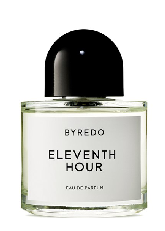

Description:
['seem funni say this eleventh hour first fragranc we ve carri base end world is howev still quit novelti first fragranc ever featur astonish new note ban timmur nepales plant relat szechwan pepper known intens almost anesthet spice also unusu bright citrussi tone worri hard imagin utter uniqu note first thing smell initi spray combin juici citrus sweet spici clovelik tone note thrill novel also possess certain familiar holiday spice style comfort heart lead everi bit origin spici earthi carrot seed set sweet seduct rum juici wild fig warm smooth tonka domin drydown real wonder 11th hour pervas ban timmur lend fragranc sweet rich spici opul orient scent distinct fresh energi last drydown accord byredo featur ingredi impos nepales highland statement kind inhospit place human may eventu forc surviv ocean level rise heavier stuff perfum descript necessarili grappl with sure least know end world arriv we re go smell great realli realli great']
Notes:
['ban timmur pepper bergam

In [5]:
inspect_perfume(perfume_id=1)

5    Sunshine Woman Eau de Parfum by Amouage
Name: title, dtype: object


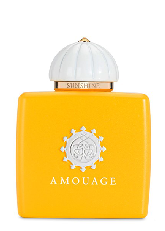

Description:
['bright joy amouag s exuber new fragranc shine like desert metropoli high noon sunshin open glow youth top note almond sweet floral davana mouthwat blackcurr liqueur ignit sens infus wearer passion energi heart fragranc reveal sophist floral bouquet luscious osmanthus fresh magnolia rich jasmin smooth togeth warm light vanilla enchant us play yet complex innoc base wonder earthi patchouli aromat cade woodi papyrus savori blond tobacco add rich longev without sacrif ounc delight airi floral charact present beauti iridesc yellow bottl sunshin appropri name warm sophist happi fragranc we re honor one select retail planet offer joy treasur']
Notes:
['blackcurr liqueur almond davana osmanthus jasmin vanilla magnolia cade patchouli blond tobacco papyrus']
Revies:
There are 1 reviews
['receiv sampl tri one today love scent howev like comment agre light powderi vanilla pipe tobacco smell it s someth see gravit it s pleasant i agre review mention tobacco strong note found fragranc

In [6]:
inspect_perfume(perfume_id=5)

# Pre-process Data

Tokenization is the act of breaking up a sequence of strings into pieces such as words, symbols… Those elements are called tokens. Tokenization include also text cleaning:


* Stemming
* Lowcasing
* Remove stop words
* Delete punctuation  
* Delete emojis



In [0]:
def stem_words(text):
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [0]:
df['description'] = df.description.apply(func=make_lower_case)
df['description'] = df.description.apply(func=remove_stop_words)
df['description'] = df.description.apply(func=remove_punctuation)
df['description'] = df.description.apply(func=stem_words)

In [0]:
df['notes'] = df.notes.apply(func=make_lower_case)
df['notes'] = df.notes.apply(func=remove_punctuation)
df['notes'] = df.notes.apply(func=stem_words)

In [0]:
df['reviews'] = df.reviews.apply(func=make_lower_case)
df['reviews'] = df.reviews.apply(func=remove_stop_words)
df['reviews'] = df.reviews.apply(func=remove_punctuation)
df['reviews'] = df.reviews.apply(func=stem_words)

In [11]:
df.head(5)

,perfume_id,title,image_url,description,notes,reviews
0,0,Lost Cherry Eau de Parfum by TOM FORD Private ...,https://www.luckyscent.com/images/products/635...,lost cherri contrast scent reveal tempt dichot...,black cherri accord bitter almond griott syrup...,tri tom ford scent madison avenu store blown a...
1,1,Eleventh Hour Eau de Parfum by BYREDO,https://www.luckyscent.com/images/products/641...,seem funni say eleventh hour first fragranc ca...,ban timmur pepper bergamot carrot seed rum wil...,cannot get enough smell eleventh hour unfortun...
2,2,Flash Back In New York Eau de Parfum by Olfact...,https://www.luckyscent.com/images/products/615...,interest origin flanker like fuzzi pictur snow...,cumin clari sage white linen saffron violet tu...,
3,3,Jubilation XXV Eau de Parfum by Amouage,https://www.luckyscent.com/images/products/418...,unabash opul noth minim celebratori elixir hap...,frankincen labdanum cist coriand davana blackb...,king charg free stress huge field beauti land ...
4,4,Gypsy Water Eau de Parfum by BYREDO,https://www.luckyscent.com/images/products/641...,entranc shape shifter one popular fragranc byr...,bergamot lemon pepper junip berri incen pine n...,surpri 3 star less review one far one favorit ...


# The Model

The model consists of two document embeddings:
* One from **LSA**,
* The other from **Doc2Vev**.

To train the LSA and Doc2Vec models, we concatenate perfume descriptions, notes and reviews into one document per perfume. We then calculate similarity between the chatbot message and perfume documents to:
* Find perfumes that are similar to the positive and neutral sentences from the chatbot message query. 
* Remove recommendations of perfumes that are similar to the negative sentences.

To calculate similarity, we use the **Cosine Similarity** from the LSA embedding and the Doc2Vec embeddings separately, and then averaged the both scores to come up with a final score.

In [0]:
df['full_document'] = df['description'] + ' ' + df['notes'] + ' ' + df['reviews']

## LSA Model

LSA simply tokenizes the words in a document with **TF-IDF**, and then compressed these features into embeddings with **SVD**. 

Typically, the **TF-IDF** weight is composed by two terms:

* **Term Frequency (TF):**  Measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, all terms are considered equally important, by computing the following: 

**TF(term) = (Number of times term appears in a document) / (Total number of terms in the document)**

* **Inverse Document Frequency (IDF):**  Measures how important a term is. It is known that certain terms, may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

**IDF(term) = log_e(Total number of documents / Number of documents with term in it)**


In [13]:
#Fit TFIDF 
#Learn vocabulary and tfidf from all style_ids.
tf = TfidfVectorizer(analyzer='word', 
                     min_df=10,
                     ngram_range=(1, 2),
                     #max_features=1000,
                     stop_words='english')
tf.fit(df['full_document'])

#Transform style_id products to document-term matrix.
tfidf_matrix = tf.transform(df['full_document'])
pickle.dump(tf, open("tfidf_model.pkl", "wb"))

print (tfidf_matrix.shape)

(2044, 8359)


**Singular Value Decomposition (SVD)** is one of the most important linear algebra concepts. It allows us to extract and untangle information.  From the SVD decomposition, we realize that we can focus on the first three principal components.

In [14]:
# Compress with SVD
svd = TruncatedSVD(n_components=500)
latent_matrix = svd.fit_transform(tfidf_matrix)
pickle.dump(svd, open("svd_model.pkl", "wb"))

print (latent_matrix.shape)

(2044, 500)


**Latent semantic analysis (LSA)** simply tokenizes the words in a document with TF-IDF, and then compressed these features into embeddings with SVD. 

In [15]:
n = 25 #pick components
#Use elbow and cumulative plot to pick number of components. 
#Need high ammount of variance explained. 
doc_labels = df.title
svd_feature_matrix = pd.DataFrame(latent_matrix[:,0:n] ,index=doc_labels)
print (svd_feature_matrix.shape)
svd_feature_matrix.head()

pickle.dump(svd_feature_matrix, open("lsa_embeddings.pkl", "wb"))

(2044, 25)


## Doc2Vec Model

**Doc2Vec** is a neural network approach to learning embeddings from a text document. Because of its architecture, this model considers context and semantics within the document. The context of the document and relationships between words are preserved in the learned embedding.

In [0]:
#Use reviews, descriptions, and notes for vocabulary 
reviews = df.reviews.values.tolist()
descriptions = df.description.values.tolist()
#notes = df.notes.values.tolist() #not using notes because sematics and order of list is not meaningfull. 

documents = []
for i in range(len(df)):
    mystr = reviews[i]
    mystr = mystr + descriptions[i]
    documents.append(re.sub("[^\w]", " ",  mystr).split())

In [0]:
formatted_documents = [gensim.models.doc2vec.TaggedDocument(doc, [i]) for i, doc in enumerate(documents)]

model = gensim.models.doc2vec.Doc2Vec(vector_size=25, min_count=5, epochs=200, seed=0, window=3, dm=1)
model.build_vocab(formatted_documents)

In [18]:
#3min
%time model.train(formatted_documents, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 6min 16s, sys: 9.95 s, total: 6min 26s
Wall time: 3min 38s


In [19]:
fname = get_tmpfile("doc2vec_model")
model.save("doc2vec_model")
model = gensim.models.doc2vec.Doc2Vec.load("doc2vec_model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
doctovec_feature_matrix = pd.DataFrame(model.docvecs.vectors_docs, index=df.title)
print (doctovec_feature_matrix.shape)
doctovec_feature_matrix.head(3)
pickle.dump(doctovec_feature_matrix, open("doctovec_embeddings.pkl", "wb"))

(2044, 25)


In [0]:
class Perfume_Information_Retrieval_Model():

    def __init__(self):
        self.dv = Doc2Vec.load("doc2vec_model")
        self.tf = pickle.load(open("tfidf_model.pkl", "rb"))
        self.svd = pickle.load(open("svd_model.pkl", "rb"))
        self.svd_feature_matrix = pickle.load(open("lsa_embeddings.pkl", "rb"))
        self.doctovec_feature_matrix = pickle.load(open("doctovec_embeddings.pkl", "rb"))
        self.df = df = pd.read_pickle("perfume_data.pkl")
        self.hal = sia()


    @staticmethod
    def stem_words(text):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
        return text


    @staticmethod
    def make_lower_case(text):
        return text.lower()


    @staticmethod
    def remove_stop_words(text):
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
        return text


    @staticmethod
    def remove_punctuation(text):
        tokenizer = RegexpTokenizer(r'\w+')
        text = tokenizer.tokenize(text)
        text = " ".join(text)
        return text


    def get_message_sentiment(self, message):
        sentences = re.split('\.|\but',message)
        sentences = [x for x in sentences if x != ""]
        love_message = ""
        hate_message = ""
        for s in sentences:
            sentiment_scores = self.hal.polarity_scores(s)
            if sentiment_scores['neg'] > 0:
                hate_message = hate_message + s
            else:
                love_message = love_message + s
        return love_message, hate_message


    def clean_message(self, message):
        message = self.make_lower_case(message)
        message = self.remove_stop_words(message)
        message = self.remove_punctuation(message)
        message = self.stem_words(message)
        return message


    def get_message_tfidf_embedding_vector(self, message):
        message_array = self.tf.transform([message]).toarray()
        message_array = self.svd.transform(message_array)
        message_array = message_array[:,0:25].reshape(1, -1)
        return message_array


    def get_message_doctovec_embedding_vector(self, message):
        message_array = self.dv.infer_vector(doc_words=message.split(" "), epochs=200)
        message_array = message_array.reshape(1, -1)
        return message_array


    @staticmethod
    def get_similarity_scores(message_array, embeddings):
        cosine_sim_matrix = pd.DataFrame(cosine_similarity(X=embeddings,
                                                           Y=message_array,
                                                           dense_output=True))
        cosine_sim_matrix.set_index(embeddings.index, inplace=True)
        cosine_sim_matrix.columns = ["cosine_similarity"]
        return cosine_sim_matrix


    def get_ensemble_similarity_scores(self, message):
        message = self.clean_message(message)
        bow_message_array = self.get_message_tfidf_embedding_vector(message)
        semantic_message_array = self.get_message_doctovec_embedding_vector(message)

        bow_similarity = self.get_similarity_scores(bow_message_array, self.svd_feature_matrix)
        semantic_similarity = self.get_similarity_scores(semantic_message_array, self.doctovec_feature_matrix)

        ensemble_similarity = pd.merge(semantic_similarity, bow_similarity, left_index=True, right_index=True)
        ensemble_similarity.columns = ["semantic_similarity", "bow_similarity"]
        ensemble_similarity['ensemble_similarity'] = (ensemble_similarity["semantic_similarity"] + ensemble_similarity["bow_similarity"])/2
        ensemble_similarity.sort_values(by="ensemble_similarity", ascending=False, inplace=True)
        return ensemble_similarity


    def get_dissimilarity_scores(self, message):
        message = self.clean_message(message)
        bow_message_array = self.get_message_tfidf_embedding_vector(message)
        semantic_message_array = self.get_message_doctovec_embedding_vector(message)

        dissimilarity = self.get_similarity_scores(bow_message_array, self.svd_feature_matrix)
        dissimilarity.columns = ["dissimilarity"]
        dissimilarity.sort_values(by="dissimilarity", ascending=False, inplace=True)
        return dissimilarity


    def query_similar_perfumes(self, message, n):

        love_message, hate_message = self.get_message_sentiment(message)

        similar_perfumes = self.get_ensemble_similarity_scores(love_message)
        dissimilar_perfumes = self.get_dissimilarity_scores(hate_message)
        dissimilar_perfumes = dissimilar_perfumes.query('dissimilarity > .3')
        similar_perfumes = similar_perfumes.drop(dissimilar_perfumes.index)

        return similar_perfumes.head(n)

    def view_recommendations(self, recs):
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10))
        ax = axes.ravel()

        for i in range(len(recs)):
            single_title = recs.index.tolist()[i]
            single_perfume = self.df.query('title==@single_title')
            name = single_perfume.title.values[0]
            notes = single_perfume.notes.values[0]
            title = "{} \n Notes: {}".format(name, notes)

            perfume_image = single_perfume.image_url.values[0]
            image = io.imread(perfume_image)
            ax[i].imshow(image)
            ax[i].set_yticklabels([])
            ax[i].set_xticklabels([])
            ax[i].set_title("\n".join(wrap(title, 20)))
            ax[i].axis('off')

        plt.show()

In [22]:
pir = Perfume_Information_Retrieval_Model()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Chatbot Interface

Describe the perfume you are looking for. You can be as detailed as you like! 


Text(value='')

Button(description='Restart!', style=ButtonStyle())

Got it! Hold tight while I find your recommendations!


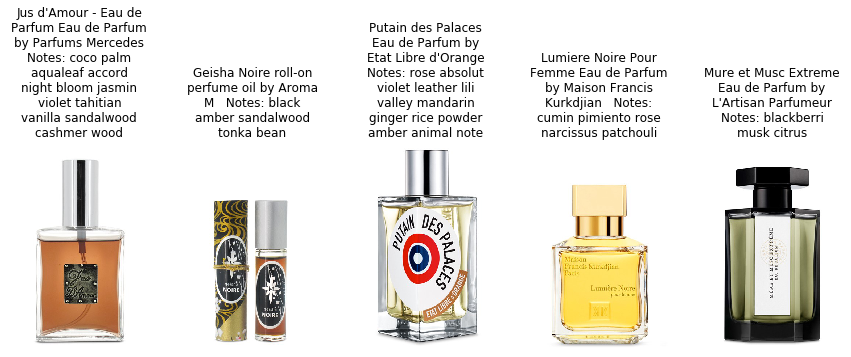

In [26]:
print ("Describe the perfume you are looking for. You can be as detailed as you like! ")
text = widgets.Text()
display(text)
button = widgets.Button(description="Restart!")
display(button)

def on_button_clicked(b):
    clear_output()
    print ("Describe the perfume you are looking for. You can be as detailed as you like! ")
    display(text)
    display(button)

def handle_submit(sender):
    print ("Got it! Hold tight while I find your recommendations!")
    message = text.value
    recs = pir.query_similar_perfumes(message, 5)
    pir.view_recommendations(recs)

text.on_submit(handle_submit)
button.on_click(on_button_clicked)